# Vérification de la conduction thermique stationnaire avec terme source :  terme source linéaire

In [1]:
from trustutils import run 
run.introduction("C. Reiss","14/03/2022")
run.description('On considere un canal cylindrique en covimac. On se place a faible reynolds. On compare la solution obtenue par le calcul en isotherme et on verifie que le profil obtenu est parabolique. On impose ensuite une condition aux limites de neumann thermique et on verifie que le profil obtenu est la solution nalytique presente dans Incropera et De Witt')
run.TRUST_parameters()

## Introduction 
 Validation made by : C. Reiss



 Report created : 14/03/2022



 Report generated 14/03/2022

### Description 
On considere un canal cylindrique en covimac. On se place a faible reynolds. On compare la solution obtenue par le calcul en isotherme et on verifie que le profil obtenu est parabolique. On impose ensuite une condition aux limites de neumann thermique et on verifie que le profil obtenu est la solution nalytique presente dans Incropera et De Witt

### TRUST parameters 
 * Version TRUST: 1.8.5_beta
 * Binary used: /volatile/catB/cr268029/trust/exec/TRUST_mpi_opt (built on TRUST /volatile/catB/cr268029/trust/Validation/Rapports_automatiques/Verification/CoviMAC/transfert_thermique_tube_laminaire/build)

In [2]:
from trustutils import run 
c1 = run.addCase(".","jdd_Incropera_De_Witt_Flow.data")
c2 = run.addCase(".","jdd_Incropera_De_Witt_Neumann.data")
run.printCases()
run.runCases()

### Test cases 
* ./jdd_Incropera_De_Witt_Flow.data : 
* ./jdd_Incropera_De_Witt_Neumann.data : 


Running ...
Traceback (most recent call last):
  File "canal_2.py", line 2, in <module>
    from salome.geom import geomBuilder
ModuleNotFoundError: No module named 'salome'
./pre_run
Traceback (most recent call last):
  File "canal_2.py", line 2, in <module>
    from salome.geom import geomBuilder
ModuleNotFoundError: No module named 'salome'
./pre_run
  => A total of 2 cases were (successfully) run in 373.2s.


## Champs de vitesse 
On compare les champs de vitesse calculé par CoviMAC et analytique.
### Comparaison des profils calculé et analytique

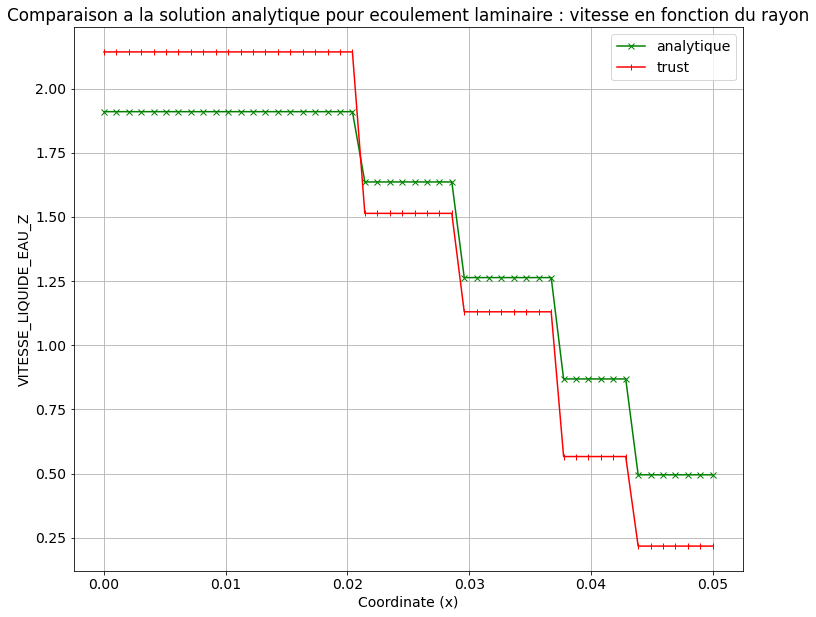

In [1]:
from trustutils.jupyter import plot
import numpy as np

Graphique=plot.Graph("Comparaison a la solution analytique pour ecoulement laminaire : vitesse en fonction du rayon")
Graphique.addSegment("./jdd_Incropera_De_Witt_Flow_V_ANALYTIQUE.son",label="analytique",color="g",marker="-x")
Graphique.addSegment("./jdd_Incropera_De_Witt_Flow_V_TRUST.son"     ,var="z",label="trust"     ,color="r",marker="-|")
x=np.linspace(0,0.05,100)
y=2*1.*(1-x**2/(0.05*0.05))
Graphique.add(x,y,label="analytique",color="pink")

## Champs de temperature 
On compare les champs de temperature calculé par CoviMAC et analytique.
### Comparaison des profils calculé et analytique

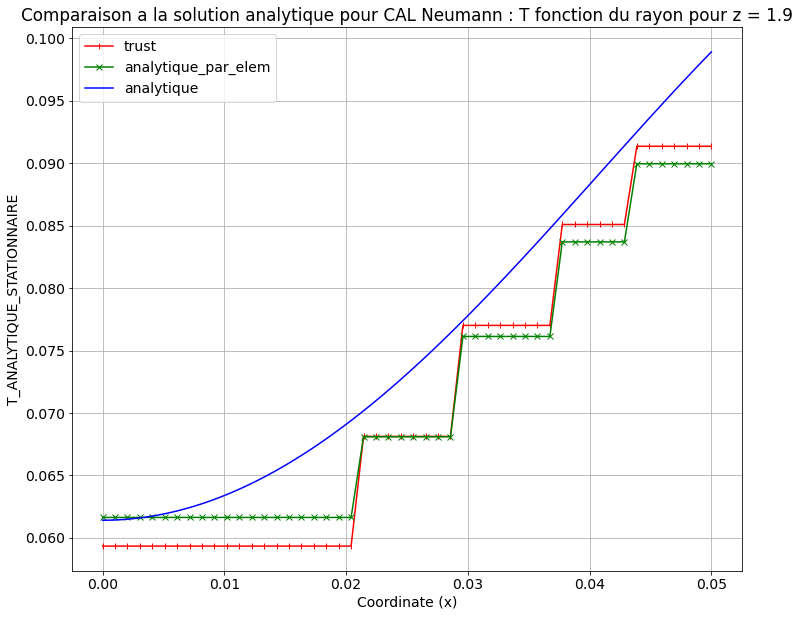

In [4]:
from trustutils.jupyter import plot
import numpy as np

Graphique=plot.Graph("Comparaison a la solution analytique pour CAL Neumann : T fonction du rayon pour z = 1.9")
Graphique.addSegment("./jdd_Incropera_De_Witt_Neumann_T_TRUST_R.son"     ,label="trust"     ,color="r",marker="-|")
Graphique.addSegment("./jdd_Incropera_De_Witt_Neumann_T_ANALYTIQUE_R.son",label="analytique_par_elem",color="g",marker="-x")

x=np.linspace(0,0.05,100)
y=2*1.*1.9/(10.*100.*1.*0.05)+1.*0.05/1.*(-7/24-1/4*(x**4)/(0.05**4)+(x**2)/(0.05**2))
Graphique.add(x,y,label="analytique",color="blue")


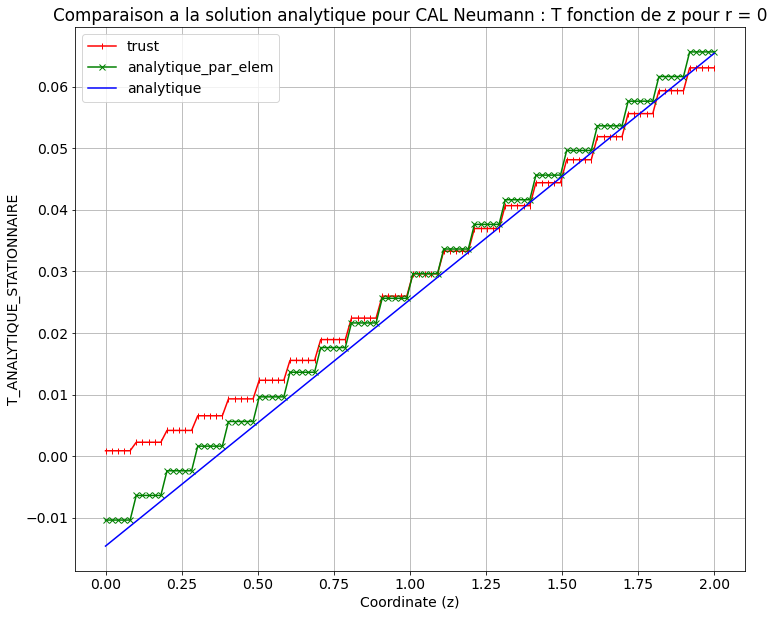

In [5]:
from trustutils.jupyter import plot
import numpy as np

Graphique=plot.Graph("Comparaison a la solution analytique pour CAL Neumann : T fonction de z pour r = 0")
Graphique.addSegment("./jdd_Incropera_De_Witt_Neumann_T_TRUST_Z.son"     ,label="trust"     ,color="r",marker="-|")
Graphique.addSegment("./jdd_Incropera_De_Witt_Neumann_T_ANALYTIQUE_Z.son",label="analytique_par_elem",color="g",marker="-x")

x=np.linspace(0,2,100)
y=2*1.*x/(10.*100.*1.*0.05)+1.*0.05/1.*(-7/24)
Graphique.add(x,y,label="analytique",color="blue")



### jdd isotherme

In [6]:
from trustutils import run
run.dumpDataset("./jdd_Incropera_De_Witt_Flow.data")

 # PARALLEL OK #
 system "rm -rf lata; mkdir -p lata"
 dimension 3
 pb_Multiphase pb
 
 Domaine dom
 
 # BEGIN MESH #
 Lire_med family_names_from_group_names dom mesh channel.med
 # END MESH #
 
 Schema_euler_implicite sch
 Read sch
 {
     tinit 0
     tmax 30
     seuil_statio 1e-12
     nb_pas_dt_max 20000
     dt_impr 1e-10
     max_iter_implicite 1
     facsec 1
     solveur sets
     {
         criteres_convergence { alpha 1e-5 pression 1e8 vitesse 1e8 temperature 1e8 }
         iter_min 5
         solveur petsc cli { }
         seuil_convergence_implicite 1e30
     }
 }
 
 CoviMAC  dis
 option_covimac {  }
 
 Fluide_Incompressible eau_liquide
 Read eau_liquide
 {
 	 mu  Champ_Uniforme     1 .1
 	 rho Champ_Uniforme     1 1.
 	 lambda Champ_Uniforme  1 1.
         Cp Champ_Uniforme      1 100.
         beta_th Champ_Uniforme 1 0.
 }
 
 phases pb
 {
     liquide { eau }
 }
 
 Associate pb dom
 Associate  pb sch
 Discretize pb dis
 
 Read pb
 {
     correlations
     {
     }
     

In [7]:
### jdd thermique

In [8]:
from trustutils import run
run.dumpDataset("./jdd_Incropera_De_Witt_Neumann.data")

 # PARALLEL OK #
 system "rm -rf lata; mkdir -p lata"
 dimension 3
 pb_Multiphase pb
 
 Domaine dom
 
 # BEGIN MESH #
 Lire_med family_names_from_group_names dom mesh channel.med
 # END MESH #
 
 Schema_euler_implicite sch
 Read sch
 {
     tinit 0
     tmax 30
     seuil_statio 1e-12
     nb_pas_dt_max 20000
     dt_impr 1e-10
     max_iter_implicite 1
     facsec 1
     solveur sets
     {
         criteres_convergence { alpha 1e-5 pression 1e8 vitesse 1e8 temperature 1e8 }
         iter_min 5
         solveur petsc cli { }
         seuil_convergence_implicite 1e30
     }
 }
 
 CoviMAC  dis
 option_covimac {  }
 
 Fluide_Incompressible eau_liquide
 Read eau_liquide
 {
 	 mu  Champ_Uniforme     1 .1
 	 rho Champ_Uniforme     1 1.
 	 lambda Champ_Uniforme  1 1.
         Cp Champ_Uniforme      1 100.
         beta_th Champ_Uniforme 1 0.
 }
 
 phases pb
 {
     liquide { eau }
 }
 
 Associate pb dom
 Associate  pb sch
 Discretize pb dis
 
 Read pb
 {
     correlations
     {
     }
     